# Réseau de neurones avec TensorFlow
## Objectif : 
Nous allons voir ensemble comment concevoir un Réseau de neurones avec TensorFlow

Le but n'est pas de rivaliser avec l'état de l'art en terme de performance (*accuracy*).

Ici, nous allons apprendre à utiliser TensorFlow pour produire un modèle opérationnel le plus *simple* possible.

Le réseau de neurones devra apprendre à lire les chiffres. C'est-à-dire, prédire correctement la valeur du chiffre tracé.
Cela n'a rien d'évident. Là où un humain voit une image représentant un chiffre, le réseau ne voit, pour sa part, qu'un ensemble de pixels

In [1]:
import tensorflow as tf
import os
import pprint
print(os.environ)


{'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', '__EGL_VENDOR_LIBRARY_DIRS': '/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/', 'CUDA_VERSION': '10.0.130', 'PATH': '/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'COLAB_USE_SEABORN_STYLE': '1', 'LD_LIBRARY_PATH': '/usr/lib64-nvidia', 'LANG': 'en_US.UTF-8', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-0=10.0.130-1', 'SHLVL': '1', 'NCCL_VERSION': '2.4.2', 'NVIDIA_VISIBLE_DEVICES': 'all', '_': '/tools/node/bin/forever', 'PYTHONPATH': '/env/python', 'CUDNN_VERSION': '7.5.0.56', 'JPY_PARENT_PID': '31', 'DEBIAN_FRONTEND': 'noninteractive', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}'

## Architecture matériel
On teste la présence d'une carte graphique (GPU)

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4338874899553649265, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4981012002283563501
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13422585131680767662
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18390676419066471396
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

## Le data-set 
On importe les images du [MNIST](https://en.wikipedia.org/wiki/MNIST_database).
C'est un ensemble de 60,000 images N&B de chiffres manuscrits.  

Le data set est séparé en 2 ensembles : 
* train : données d'apprentissage 
* test : données de test

Avec à chaque fois, dans des répertoires séparés, les images et les labels correspondants aux images.

### Dimension des données 
Dans notre cas, par commodité, le data-set stocke les images sur **une** seule dimension.
Les images des chiffres 28 x 28 pixels sont donc un vecteur de dimension 784 (28 * 28).

Au lieu, d'une image carrrée, vous imaginez un "tube". Les images sont "applaties" (*flatten*) sur une dimension. On a décallé tous les pixels, les uns à la suite des autres.

### Les labels
Les labels représentent la valeur attendue. La valeur du chiffre tracé à la main. Les labels sont, pour chaque image, la valeur du chiffre dont on a l'image
#### One-hot encoding
Les labels ont un encodage *one-hot* : 0 ou 1.

La **position** de la valeur 1 nous donne le label, la vraie valeur de l'image
(index commence à 0)

Exemple :


```
[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]
```
En **position** 2, nous avons la valeur 1. Le chiffre est donc un 2 




Exemple :
Le label de la 10ème image 


```
mnist.train.labels[9]
```



In [5]:
import numpy as np
print(mnist.train.labels[9])
# position ?
print("c est un :",np.argmax(mnist.train.labels[9]))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
('c est un :', 8)


### Visualisation d'une image du data-set
Pour visualiser, on utilise la librairie *matplotlib*

Lien internet [matplotlib](https://matplotlib.org/)

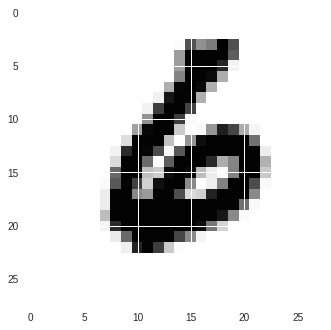

In [6]:
import matplotlib.pyplot as plt
## transformation en image 28 x 28 pixels
img = mnist.train.images[99].reshape(28,28)

plt.imshow(img)

## Exercice
Quel est le label de ce chiffre manuscrit ?

In [0]:
# votre code



### Placeholder
TensorFlow "alimente" les modèles de calcul en  données grace aux **placeholders**.

C'est un noeud du graph de calcul qui ne réalise **aucun** calcul mais qui est chargé d'alimenter, d'emettre des données à l'exécution (*run time*).

In [0]:
# training data placeholders
# input x : 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# output 10 chiffres (0 à 9)
y = tf.placeholder(tf.float32, [None, 10])

On indique 
* le type de donnée : ```
tf.float32
```

  
* **dimension du Placeholder** : on laisse la 1ère dimension de chaque placeholder à vide *(None)*. De cette façon, on peut envoyer un nombre *variable* d'images à chaque itération (phase d'apprentissage).
Pour la seconde dimension, on indique la dimension du vecteur que l'on envoie (784 puis 10)


## Réseau de neurones avec TensorFlow

### La dimension du réseau de neurones
Dans TensorFlow, on doit écrire le détail des opérations qui sont effectuées à chaque couche du réseau

### Rappel sur les MLP
Les réseaux de neurones multi-couches (*MLP, Multi Layers Perceptron*) 
1.   réalisent à chaque couche une transformation des données d'entrée
2.   communiquent le résultat à la couche suivante

Ce sont donc des transformations successives qui sont opérées, à chaque couche. 

Chaque neurone d'une couche calcule l'information (*output*) qu'il transmet à la couche suivante. Pour cela, il applique: 
```
output = fonction_activation(input * poids + biais)
```

Plus formellement:
```
output = f(x * W + b)
```
*output* est l'input de la couche suivante

* *f* : fonction d'activation qui va permettre au réseau d'apprendre
* *x* : les inputs de la couche
* *W* : les poids des connections des neurones de cette couche. L'**inconnue du problème**
* *b* : les biais des connections des neurones de cette couche 
(les biais augmentent la "flexibilité" du réseau)

Dans notre cas, 

**Couche entrée** :
Les images représentées sous forme d'un vecteur de dimension 784 (28 x 28).

Les données d'entrée (images) sont connectées aux  poids des connections des (300) neurones de la couche suivante (couche cachée).



In [9]:
# les poids : connection input -> (couche cachée) hidden layer
input_dim = 784
output_dim = 300
W1 = tf.Variable(tf.random_normal([input_dim, output_dim], stddev=0.03), name='W1')
b1 = tf.Variable(tf.zeros([output_dim]) , name = 'b1')

Instructions for updating:
Colocations handled automatically by placer.


**Couche cachée** :

Les neurones de la couche cachée sont connectés aux (10) neurones de la couche de sortie

**Schéma**

```
images [inputs : 784] -> couche cachée : [300 neurones] -> sortie : [10 neurones]
```


In [0]:
# les poids : connection (couche cachée) hidden layer -> (couche de sortie) output layer
input_dim = output_dim
output_dim = 10
W2 = tf.Variable(tf.random_normal([input_dim, output_dim], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([output_dim]), name='b2')

### Fonction d'activation
```
output = f(x * W + b)
```
Ici la fonction d'activation est une fonction ```
ReLu (Rectified Linear unit)
```



In [0]:
# x * W + b
# image -> hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)

# calcul output de la couche cachée (hidden layer)
hidden_out = tf.nn.relu(hidden_out)

### Calcul de la couche de sortie
On utilise une fonction *softmax* qui permet au réseau d'emettre une probabilité après l'analyse de chaque image. 

La décision sera la plus forte probabilité.

**Exemple** : 10% de chances que soit un "3" ou un "2", 80% que ce soit un "9", le reste à 0%.
Dans ce cas, la décision serait : c'est un "9" (proba = 80%).


In [0]:
# now calculate the hidden layer output - in this case, let's use a softmax activated
# couche de sortie : output layer
hidden_out = tf.add(tf.matmul(hidden_out, W2), b2)
y_ = tf.nn.softmax(hidden_out)
#y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

#### point technique
Afin de faciliter l'apprentissage du réseau, on borne la sortie du réseau (la prédiction) à l'aide de 

```
tf.[clip_by_value]()
```

Lien doc [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/clip_by_value)

In [0]:
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)

### Calcul de la fonction d'erreur
Durant la phase d'apprentissage, à chaque itération, on calcule une erreur d'apprentissage.

La valeur de cette erreur est l'objectif que l'*optimizer* essaie de rendre le plus petit possible (*erreur min*).

In [0]:
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

### Optimizer
L'*optimizer* est la **méthode** de recherche du minimum de la fonction l'erreur.

L'*optimizer* est un algorithme d'optimisation qui fait une recherche "intelligente" des poids des connections entre les neurones avec pour objectif de rendre l'erreur la plus faible possible.

In [15]:
# optimizer : GradientDescentOptimizer
learning_rate = 0.5
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [0]:
# initialisation des variable
init_op = tf.global_variable_initializer()

# accuracy : % bonnes prédictions
correct_prédictions = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prédictions, tf.float32))

## Calcul du graph TensorFlow
Les étapes du calcul du graph :
* démarrer une session
* initialisation
* pour toutes les itérations (*epoch*)
* démarrer un *batch*
* optimiser les poids (*optimiser*) & calculer l'erreur de prédiction (*cross entropy*)
* passer au *batch* suivant


In [18]:
epochs = 25
batch_size = 100

# démarrer session
with tf.Session() as sess:
   # initialisation variable
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
   print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))  

('Epoch:', 1, 'cost =', '0.522')
('Epoch:', 2, 'cost =', '0.193')
('Epoch:', 3, 'cost =', '0.135')
('Epoch:', 4, 'cost =', '0.101')
('Epoch:', 5, 'cost =', '0.079')
('Epoch:', 6, 'cost =', '0.062')
('Epoch:', 7, 'cost =', '0.047')
('Epoch:', 8, 'cost =', '0.037')
('Epoch:', 9, 'cost =', '0.027')
('Epoch:', 10, 'cost =', '0.021')
('Epoch:', 11, 'cost =', '0.015')
('Epoch:', 12, 'cost =', '0.010')
('Epoch:', 13, 'cost =', '0.008')
('Epoch:', 14, 'cost =', '0.005')
('Epoch:', 15, 'cost =', '0.004')
('Epoch:', 16, 'cost =', '0.003')
('Epoch:', 17, 'cost =', '0.003')
('Epoch:', 18, 'cost =', '0.002')
('Epoch:', 19, 'cost =', '0.002')
('Epoch:', 20, 'cost =', '0.002')
('Epoch:', 21, 'cost =', '0.002')
('Epoch:', 22, 'cost =', '0.001')
('Epoch:', 23, 'cost =', '0.001')
('Epoch:', 24, 'cost =', '0.001')
('Epoch:', 25, 'cost =', '0.001')
0.9829


A chaque *epoch*, on envoie un lot de données dans l'algorithme afin d'ajuster un peu plus les poids des connections. On utilise la  fonction ```
next_batch ```

Calcul du  prochain lot (*batch*), on déclenche le calcul des noeuds du graph (*optimiser, cross_entropy*)
et on alimente le vecteur d'entrée *batch_x* et le lot de sortie attendu *batch_y*. 

Ceci nous montre l'utilité des *placeholders*.

Et enfin on mesure la valeur de la fonction d'erreur sur l'exemple en cours (*c* ) puis on moyenne sur tous les exemples du batch (*avg_cost*).


## Exercice 1 (facile)
Changer le nombre de neurones de la couche cachée.
Affectez 30 neurones au lieu de 300 neurones.
Modifiez le script en conséquence

In [0]:
# votre code

## Exercice 2 (difficile)
Ajoutez **une** couche cachée supplémentaire de 150 neurones au réseau.

* Définir les variable *W3, b3* de cette couche
* Connecter cette couche à la couche de sortie
* Lancer le calcul (*graph*)
* Cette couche supplémentaire est-elle appropriée (diminution de l'erreur ou pas) ?

In [0]:
# votre code ici